In [ ]:
# Importing important libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the data
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# EDA
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# Seperating the input features and target variable
X = iris.data
y = iris.target

# printing the shape
print('Shape :', X.shape)
print('Shape :', y.shape)

Shape : (150, 4)
Shape : (150,)


In [ ]:
# Seperating the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Searching for optimal values of K
from sklearn.model_selection import cross_val_score

# list the scores from k_range
k_range = range(1, 26)
k_scores = []

# Looping through the values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [ ]:
# printing the scores
print(k_scores)

[np.float64(0.975), np.float64(0.9666666666666668), np.float64(0.975), np.float64(0.9666666666666668), np.float64(0.9833333333333334), np.float64(0.9583333333333334), np.float64(0.9666666666666668), np.float64(0.9666666666666668), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9833333333333334), np.float64(0.975), np.float64(0.9666666666666666), np.float64(0.975), np.float64(0.975), np.float64(0.95), np.float64(0.9583333333333334), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.95), np.float64(0.9333333333333333)]


In [ ]:
'''
Cross Validation Blog ->
https://medium.com/@ompramod9921/cross-validation-623620ff84c2
'''

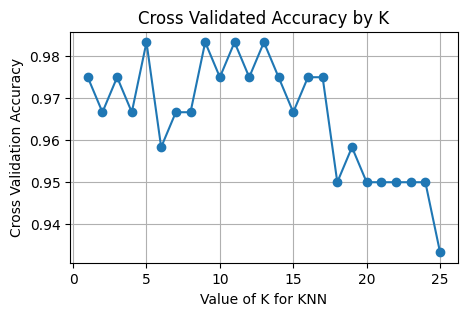

In [ ]:
# Plotting the value of k for kNN
plt.figure(figsize = (5, 3))
plt.plot(k_range, k_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validated Accuracy by K')
plt.grid()
plt.show()

In [ ]:
'''
From the above plot, k = 5, 9, 11 and 13 are giving best results to us.

By the first rule, k%n != 0; we can remove 9 by this logic
Out of k = 5, 11 and 13, we will select the highest value (13) because
higher value of k for same performance gives smoother curve.
'''

In [ ]:
# Optimum Model
knn = KNeighborsClassifier(n_neighbors = 13)

# Fitting the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [ ]:
# Taking predictions from the model
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [ ]:
# Evaluating the model
print('Training Accuracy :', np.round(metrics.accuracy_score(y_train, y_train_pred), 2))
print('Training Precision :', np.round(metrics.precision_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training Recall  :', np.round(metrics.recall_score(y_train, y_train_pred, average = 'weighted'), 2))
print('Training F1 Score :', np.round(metrics.f1_score(y_train, y_train_pred, average = 'weighted'), 2))

print('\nTesting Accuracy :', np.round(metrics.accuracy_score(y_test, y_test_pred), 2))
print('Testing Precision :', np.round(metrics.precision_score(y_test, y_test_pred, average = 'weighted'), 2))
print('Testing Recall  :', np.round(metrics.recall_score(y_test, y_test_pred, average = 'weighted'), 2))
print('Testing F1 Score :', np.round(metrics.f1_score(y_test, y_test_pred, average = 'weighted'), 2))

Training Accuracy : 0.98
Training Precision : 0.98
Training Recall  : 0.98
Training F1 Score : 0.98

Testing Accuracy : 0.97
Testing Precision : 0.97
Testing Recall  : 0.97
Testing F1 Score : 0.97


In [ ]:
# The above model looks optimal